<a href="https://colab.research.google.com/github/RufinoMartin/Mental-Health-Survey/blob/main/M_H_Survey_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

# Mental Health Survey


The Open Source Mental Health performs anual surveys to measure mental health in the Tech Community, apart from offering other various resources. 

In this notebook, we will be focusing on their 2014 & 2016 datasets.

The institute makes available all their datasets, which represent the 2014-2021 period (except for 2015 which was not conducted). We choose to keep the years above mentioned for analysis for statistical weight reasons:

-  The survey-response volume decreased through time, thus also decreasing the number of rows in the datasets. As a consequence, the data looses statistical weight, as the sample gets significantly smaller.
-  The operationalization of variables changed, this means, that while the interest variable may have persisted through time, the way in which it was collected (que questions' style) changed. 
-  For more details, head to the preprocessing notebook:

https://github.com/RufinoMartin/Mental-Health-Survey/blob/main/M.H%20Survey%20Merge.ipynb

The original datasets can be found, year by year, at the OSMH website:

https://osmhhelp.org/research






# Library Import


In [1]:
# Library Import

# Data Manipulation

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Warnings

import warnings 
warnings.filterwarnings('ignore')

# Data Import

Repository RAW file:

https://github.com/RufinoMartin/Mental-Health-Survey/blob/main/M.H%20Survey.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Mental-Health-Survey/main/M.H%20Survey.csv')
df.head(5)

,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,4,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

# Data Library

As fetched from the  OSMH Kaggle Dataset, this dataset contains the following data, obtained from Surveys in form of open questions: 

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

In the preprocessing notebook, the columns:

- "comments" (70% non-responses, which makes it unfit. It would ve been interesting for a WordCloudPlot, which could be tried without validity pretensions)
-  "state" (as it applies only for US countries) and 
-  "Timestamp" (could have served well with some homogenity in quality and quantity of year-to-year survey, which is not the case)

were dropped, as they do not contribute to our analysis. For the moment being, we will keep the column "Country", to see whether the data offers any worthy analysis. 

# Exploratory Data Analysis (EDA)

In [3]:
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(df)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(2692, 25) 
------------------------------------------------------------------------------------

Columns :
Index(['Unnamed: 0', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0       

# Missing Values

## Missing Values Heatmap

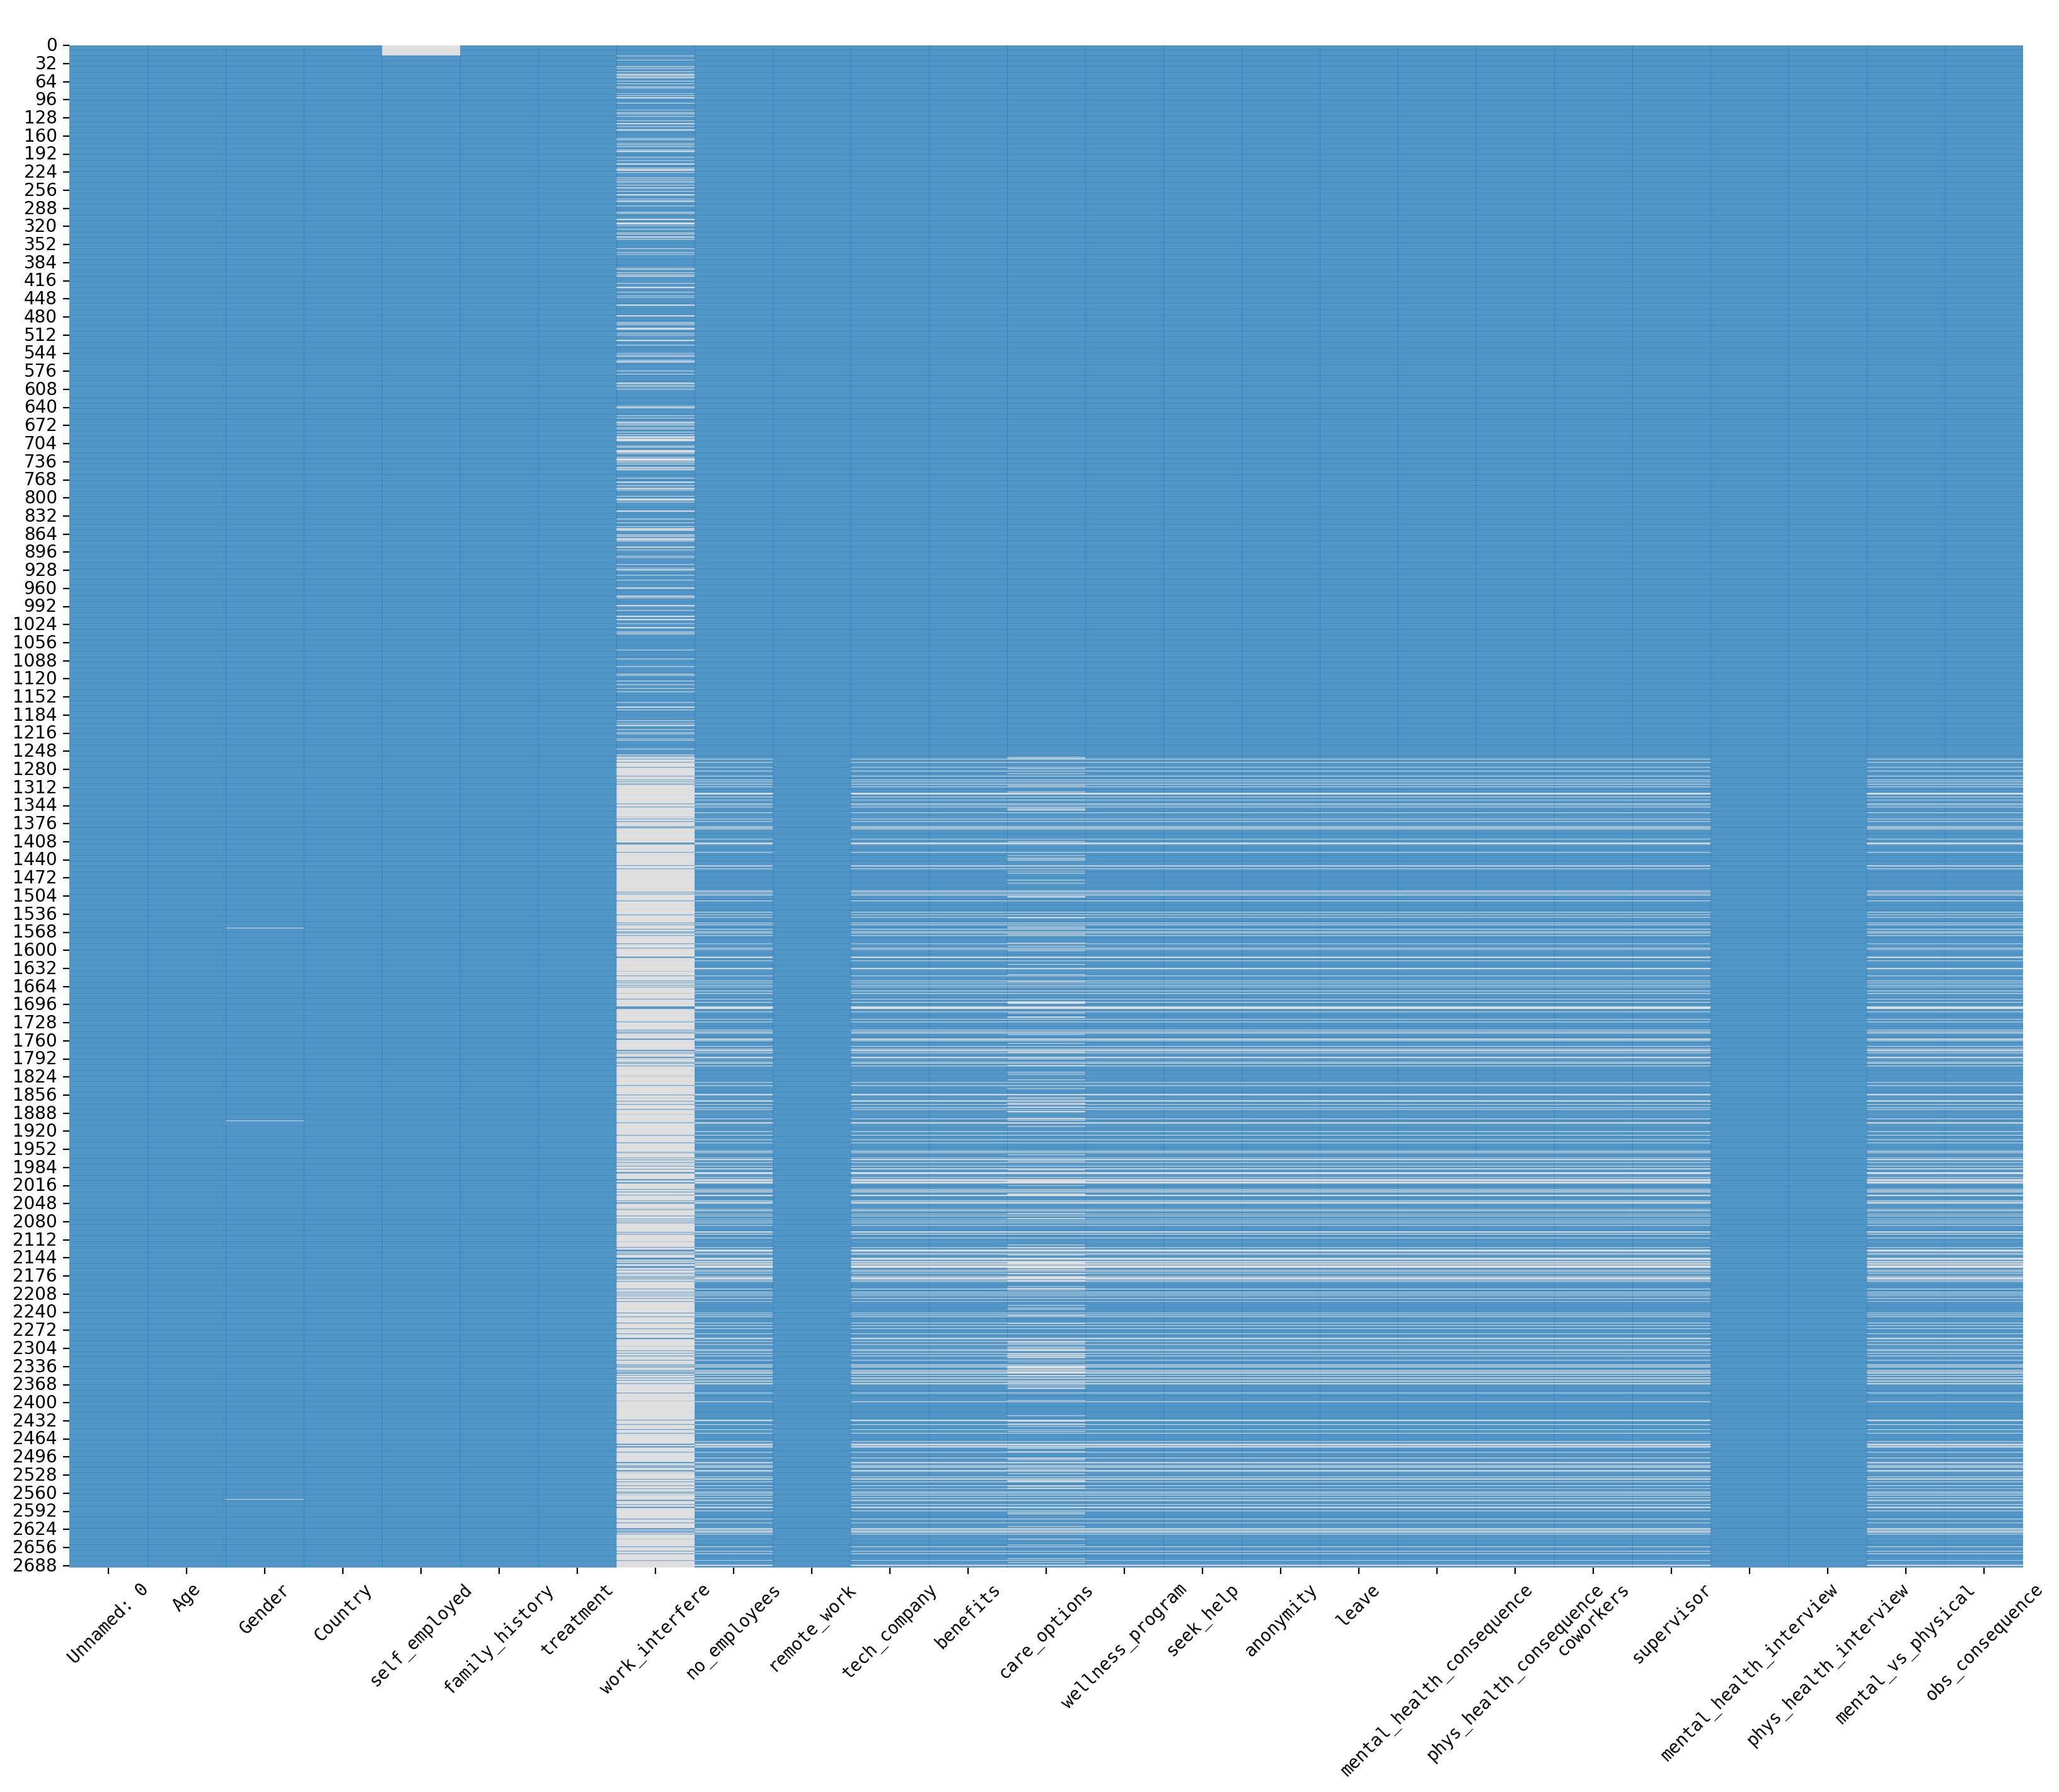

In [4]:
plt.figure(figsize=(20,16) , dpi=200)
sns.heatmap(df.isna(), cmap='tab20c', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = 'w',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont, rotation='45')
plt.show()

## Missing Values Column Index

In [5]:
cols = []
props = []
prop = {'Column' : cols, 'Missing_Proportion': props}
for col in df.columns:
    missing_prop = df[col].isna().sum() / df.shape[0] * 100
    if missing_prop > 0:
        cols.append(col)
        props.append(missing_prop)
 
prop = pd.DataFrame(prop).sort_values('Missing_Proportion', ignore_index=True)
prop.style.applymap(lambda x : "background-color: w")

,Column,Missing_Proportion
0,Gender,0.111441
1,self_employed,0.668648
2,supervisor,10.661218
3,coworkers,10.661218
4,phys_health_consequence,10.661218
5,mental_health_consequence,10.661218
6,leave,10.661218
7,anonymity,10.661218
8,seek_help,10.661218
9,wellness_program,10.661218


Lots of variables with a 10% MV. Yet, the biggest hole lies in 'work_interference'.
Lets bring that variable again to the table:

*work_interfere: If you have a mental health condition, do you feel that it interferes with your work?*

We will proceed, as with the others, to fill them with "random" values.

In [6]:
# We take a look at the head to see what input to randomize. 

df.head(10)

,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,4,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,5,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,6,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,7,39,M,Canada,NaN,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,8,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,9,23,Male,Canada,NaN,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


Here we go............there must be a simpler way...just cant stackoverflow enough today =).

In [7]:
print("unique answers for 'coworkers' are: ", df['coworkers'].unique() ) 
print("unique answers for 'self_employed' are: ", df['self_employed'].unique() ) 
print("unique answers for 'supervisor' are: ", df['supervisor'].unique() ) 
print("unique answers for 'phys_health_consequence' are: ", df['phys_health_consequence'].unique() ) 
print("unique answers for 'mental_health_consequence' are: ", df['mental_health_consequence'].unique() ) 
print("unique answers for 'leave' are: ", df['leave'].unique() ) 
print("unique answers for 'anonymity' are: ", df['anonymity'].unique() ) 
print("unique answers for 'seek_help' are: ", df['seek_help'].unique() ) 
print("unique answers for 'wellness_program' are: ", df['wellness_program'].unique() ) 
print("unique answers for 'benefits' are: ", df['benefits'].unique() ) 
print("unique answers for 'tech_company' are: ", df['tech_company'].unique() ) 
print("unique answers for 'no_employees' are: ", df['no_employees'].unique() ) 
print("unique answers for 'mental_vs_physical' are: ", df['mental_vs_physical'].unique() ) 
print("unique answers for 'obs_consequence' are: ", df['obs_consequence'].unique() )
print("unique answers for 'care_options' are: ", df['care_options'].unique() )
print("unique answers for 'work_interfere' are: ", df['work_interfere'].unique() ) 

unique answers for 'coworkers' are:  ['Some of them' 'No' 'Yes' 'Maybe' nan]
unique answers for 'self_employed' are:  [nan 'Yes' 'No' '0' '1']
unique answers for 'supervisor' are:  ['Yes' 'No' 'Some of them' 'Maybe' nan]
unique answers for 'phys_health_consequence' are:  ['No' 'Yes' 'Maybe' nan]
unique answers for 'mental_health_consequence' are:  ['No' 'Maybe' 'Yes' nan]
unique answers for 'leave' are:  ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy' 'Neither easy nor difficult' nan "I don't know"]
unique answers for 'anonymity' are:  ['Yes' "Don't know" 'No' "I don't know" nan]
unique answers for 'seek_help' are:  ['Yes' "Don't know" 'No' nan "I don't know"]
unique answers for 'wellness_program' are:  ['No' "Don't know" 'Yes' nan "I don't know"]
unique answers for 'benefits' are:  ['Yes' "Don't know" 'No' 'Not eligible for coverage / N/A' nan
 "I don't know"]
unique answers for 'tech_company' are:  ['Yes' 'No' '1.0' nan '0.0']
unique answers for 'no_e

In [21]:
# Imputing First Batch

df['Gender'] = df['Gender']\
                      .fillna(pd.Series(np.random.choice(['Male', 'Female'], p=[0.117647, 0.882353], size=len(df))));  #In any case, we are grouping by these two options later. 


df['self_employed'] = df['self_employed']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(df))));


df['supervisor'] = df['supervisor']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Some of them', 'Maybe']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(df))));

                
print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , df.isnull().sum().sum())



Total empty values in the Dataset : 2142


In [22]:
# Imputing Second  Batch

df['leave'] = df['leave']\
                      .fillna(pd.Series(np.random.choice(['Somewhat easy', 'Don´t know', 'Somewhat difficult', 'Very difficult',
 'Very easy', 'Neither easy nor difficult' ], size=len(df))));


df['benefits'] = df['benefits']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'Dont know','No', 'Not eligible for coverage']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(df))));

df['work_interfere'] = df['work_interfere']\
                      .fillna(pd.Series(np.random.choice(['Sometimes', 'Never', 'Rarely', 'Often']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(df))));
                      
df['tech_company'] = df['tech_company']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(df))));

df['no_employees'] = df['no_employees']\
                      .fillna(pd.Series(np.random.choice(['6-25', 'More than 1000', '26-100' ,'100-500', '1-5' ,'500-1000'], size=len(df))));


df['obs_consequence'] = df['obs_consequence']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(df))));



print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , df.isnull().sum().sum())

Total empty values in the Dataset : 2142


In [23]:
# Imputing Third Batch

df['coworkers'] = df['coworkers']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Some of them']
                                                         ,size=len(df))));


df['anonymity'] = df['anonymity']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Don´t know']
                                                         ,size=len(df))));                                                        


df['phys_health_consequence'] = df['phys_health_consequence']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Maybe']
                                                         ,size=len(df))));

df['mental_health_consequence'] = df['mental_health_consequence']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Maybe']
                                                        , size=len(df))));


df['seek_help'] = df['seek_help']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Don´t know']
                                                         ,size=len(df))));


df['wellness_program'] = df['wellness_program']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Don´t know']
                                                         , size=len(df))));

df['mental_vs_physical'] = df['mental_vs_physical']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Don´t know']
                                                         , size=len(df))));

df['care_options'] = df['care_options']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No', 'Not Sure']
                                                         , size=len(df))));                                                         

print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , df.isnull().sum().sum())




Total empty values in the Dataset : 0


We are done with out missing values, but still preprocessing to do ahead. Lets take a took.

## Feature Engineering

### Column: Gender

In [25]:
#Lets see how many genders are present. 

df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means',
       'I identify as female.', 'female ', 'Bigender',
       'Female assigned at birth ', 'man', 'fm', 'Cis female ',
       'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme',
       'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', 

Objectively, as this is not a gender-oriented reasearch, all this options must be condensed upon "Male", "Female" and "Other", which are the available options at a state and business level for classifying individuals. We proceed to re-categorize. Not the best idea to survey these variables with open questions... 

In [29]:
other  = ['Transgender woman','AFAB','Unicorn','Cis-woman', 'cisdude', 'Genderflux demi-girl', 'female-bodied; no feelings about gender', 'cis man' 'AFAB' 'Transgender woman''Unicorn' ,'Male (trans, FtM)','human','Nonbinary','Male/genderqueer', 'mail',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ", 'none of your business', 'genderqueer', 'Human', 'Genderfluid', 'genderqueer woman', 'mtf', 'Queer', 'Dude', 'Fluid','Other','male 9:1 female, roughly','Androgynous','Transitioned, M2F', 'Genderfluid (born female)', 'Other/Transfeminine', 'Female or Multi-Gender Femme','fm','other', 'Bigender','A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']
male   = ['cis man','MALE','male ','M|','Sex is male','nb masculine','Male (cis)','Cis male', 'Male.','man','male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
female = [' Female','Female (props for making this a freeform field, though)','fem','Cisgender Female','female/woman','Cis female ','Female assigned at birth ','I identify as female.', 'female ','Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']

df['Gender'].replace(to_replace = other, value = 'other', inplace=True)
df['Gender'].replace(to_replace = male, value = 'M', inplace=True)
df['Gender'].replace(to_replace = female, value = 'F', inplace=True)

print('\033[1m' + 'Unique values in updated Gender column :' + '\033[0m', df.Gender.unique())

Unique values in updated Gender column : ['F' 'M' 'other']


### Column: Age

In [37]:
print('\033[1m' + 'Range of column Age (Before) :' + '\033[0m', (df.Age.min(), df.Age.max()))

Range of column Age (Before) : (-1726, 99999999999)


Again, the damage taken for not using restricted optiones to survey (0-99years). We proceed to drop <15 and 70> years. (highly unlikely to be working at that age). 

In [40]:
age = []
for i in df.Age:
    if (i<15) or (i>70):
        age.append(31)   # Median
    else:
        age.append(i)

df['Age'] = age

print('\033[1m' + 'Range of column Age :' + '\033[0m', (df.Age.min(), df.Age.max()))

Range of column Age : (15, 70)


We are done with Age column now. 

# Data Visualization

## Univariate Data Analysis